# Binary Classsification with a Bank Churn Dataset (EDA)

고객이 bank account를 계속 사용할 것인지 해지할 것인지 예측하는 모델  
**피처 설명**  
1. id
2. CustomerId : 각 고객에 대한 고유 식별자
3. Surname : 고객의 성 또는 이름
4. CreditScore : 고객의 신용 점수를 나타내는 숫자 값
5. Geography : 고객이 거주하는 국가(프랑스, 스페인 또는 독일)
6. Gender : 고객의 성별(남성 또는 여성)
7. Age : 고객의 나이
8. Tenure : 고객이 은행과 거래한 기간
9. Balance : 고객의 계정 잔액
10. NumOfProducts : 고객이 사용하는 은행 상품 수(예: 예금 계좌, 신용카드)
11. HasCrCard : 고객의 신용카드 보유 여부(1 = yes, 0 = no)
12. IsActiveMember : 고객이 acitve한 회원인지 여부(1 = yes, 0 = no)
13. EstimatedSalary : 고객의 예상 급여
14. Exited : 고객 이탈 여부(1 = yes, 0 = no)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\sudea\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train_data = pd.read_csv('bank_churn.csv')
test_data = pd.read_csv('bank_churn_test.csv')

### Train Data

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Null 값 존재x  
float형 5개, int형 6개, object 3개

In [5]:
train_data.describe().T.style.background_gradient()
# describe는 수치형 칼럼에 대한 기초 통계량 (평균, 표준편차, 최소값, 최대값, 25/50/75/백분위수 등)을 요약해서 보여줌
# T는 transpose로 칼럼을 인덱스로, 인덱스를 칼럼으로 바꿈
# 높은 값이 파란색 계열로 강조됨

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


### Test Data

In [6]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [8]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


### 결측치 분포 시각화

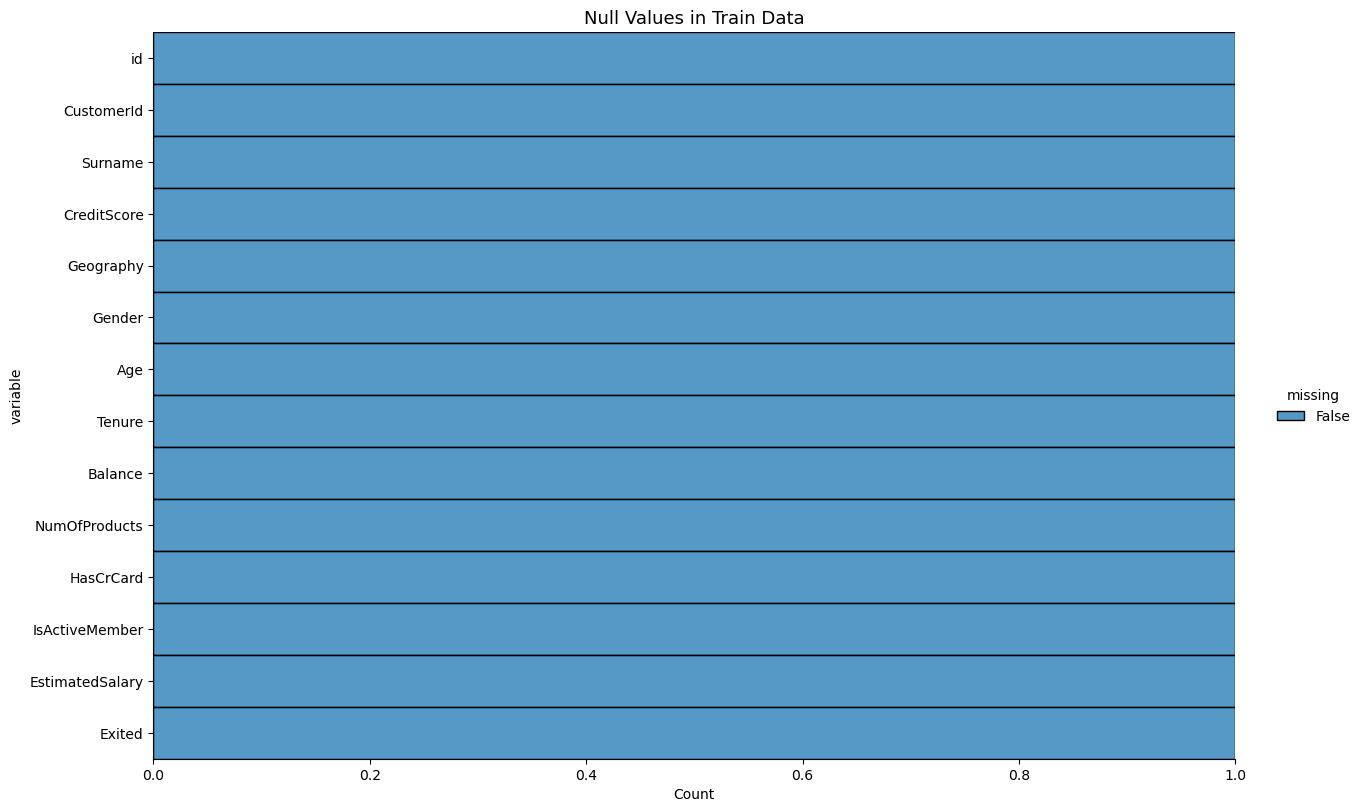

In [9]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),  
    y='variable',  # y축에 표시될 데이터
    hue='missing', # missing의 열의 값에 따라 색상을 구분하여 표시
    multiple='fill',  # 여러 범주의 분포를 같은 공간에 겹쳐서 표시
    height=8,  # 그래프의 높이
#     width=10,
    aspect=1.6  # 너비가 높이의 1.6배
)
# 분포를 시각화하는 함수 'displot'
# train_data.isnull() : train_data 데이터 프레임 내의 결측치 분포를 시각화하는 방법을 보여줌. True(결측치), False(결측치 아님)
# .melt(value_name='missing') : 각 변수를 row로 길게 늘여 표현. 열의 이름을 'missing'으로.
# 각 변수와 해당 변수에서의 결측치 유무가 포함된 긴 형태의 데이터 프레임 생성

plt.title('Null Values in Train Data', fontsize=13)
plt.show()

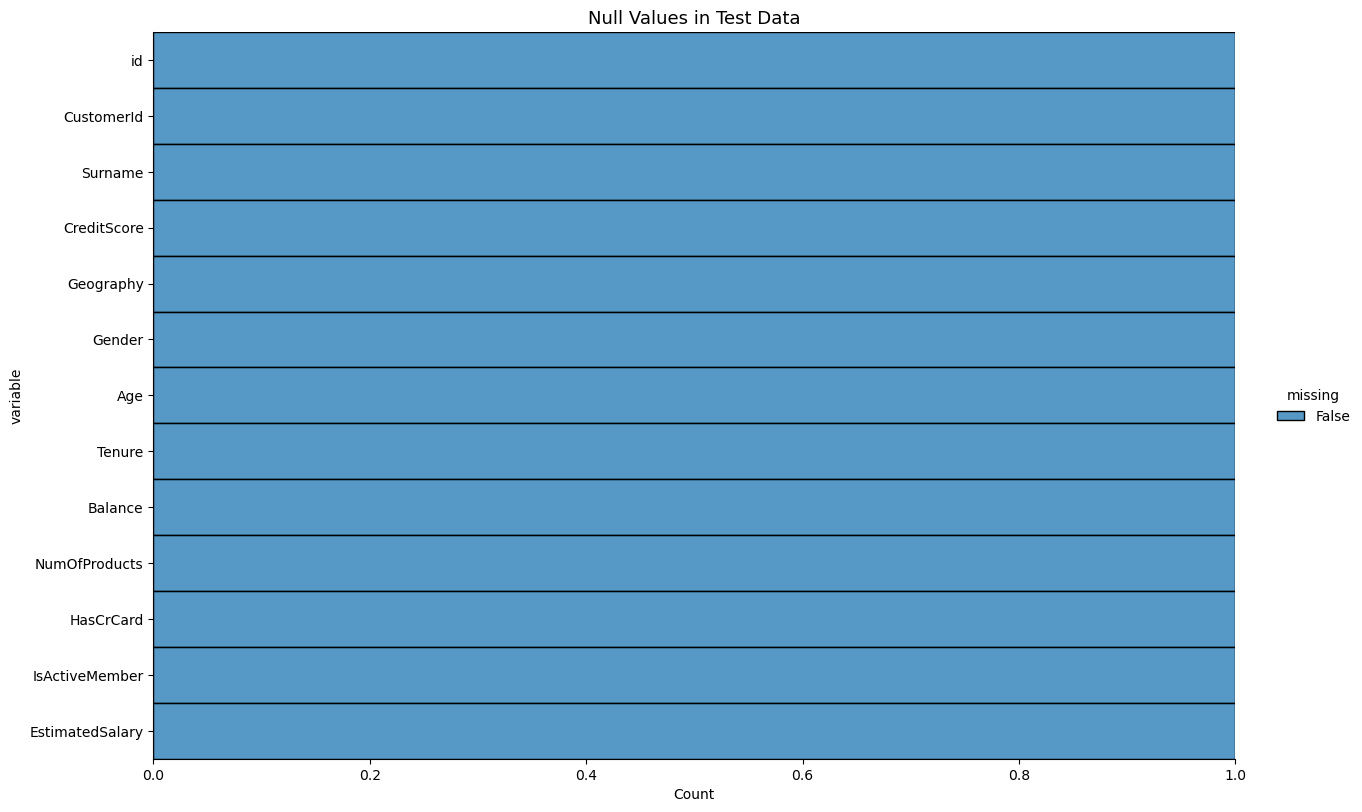

In [10]:
sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

train과 test data에는 모두 결측치가 없다는 것을 알 수 있다

### Target Variable Anlaysis

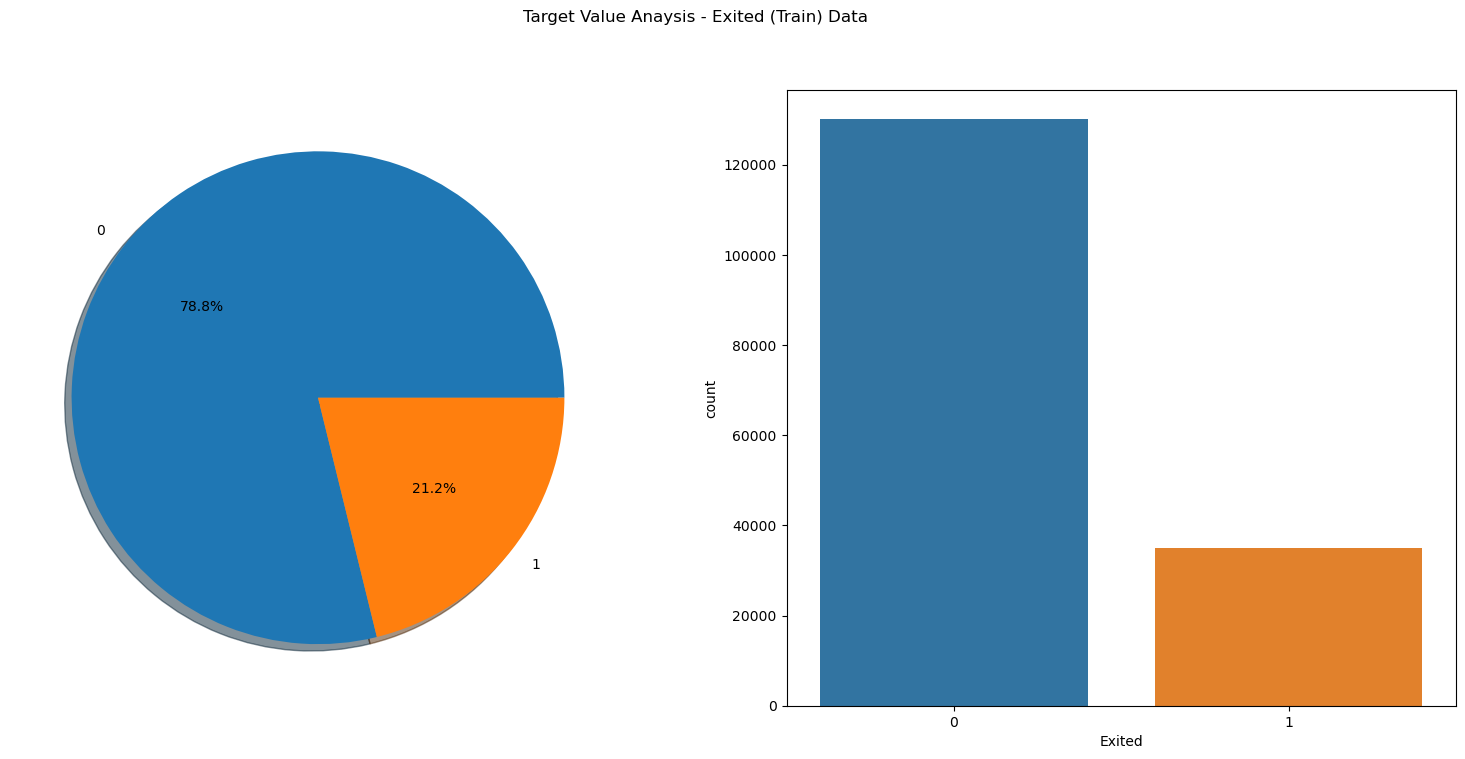

In [12]:
# train data의 레이블 값 분포 plot
f,ax=plt.subplots(1,2,figsize=(19,8)) # 1행 2열의 서브플롯 생성
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# Exited 열의 값의 분포를 파이 차트로 표현. 첫 번째 서브플롯에 그림. 그림자 효과 추가
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
# Exited 열의 값에 따른 빈도수를 막대 그래프로 표시
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Exited (Train) Data')
plt.show()

In [13]:
# 각 열에 대해 고유값의 수를 계산하고, 그 결과를 unique_counts에 저장
unique_counts = train_data.nunique()

# 연속 변수와 범주형 변수를 구분하는데 사용할 기준값으로 12 설정
threshold = 12
# 고유값의 수가 12보다 큰 column들을 연속 변수로 간주 -> column들의 이름들을 리스트로 만들어 변수에 저장
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
# 고유값의 수가 12 이하인 column들을 범주형 변수로 간주 -> column들의 이름들을 리스트로 만들어 변수에 저장
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

### Categorical Variables Analysis

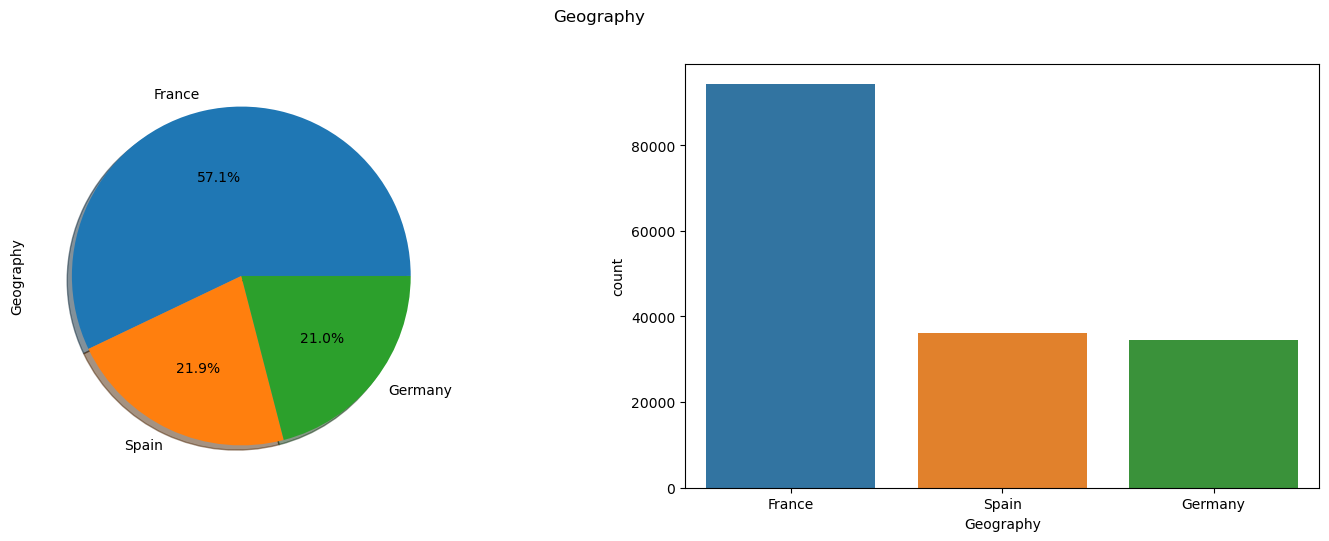

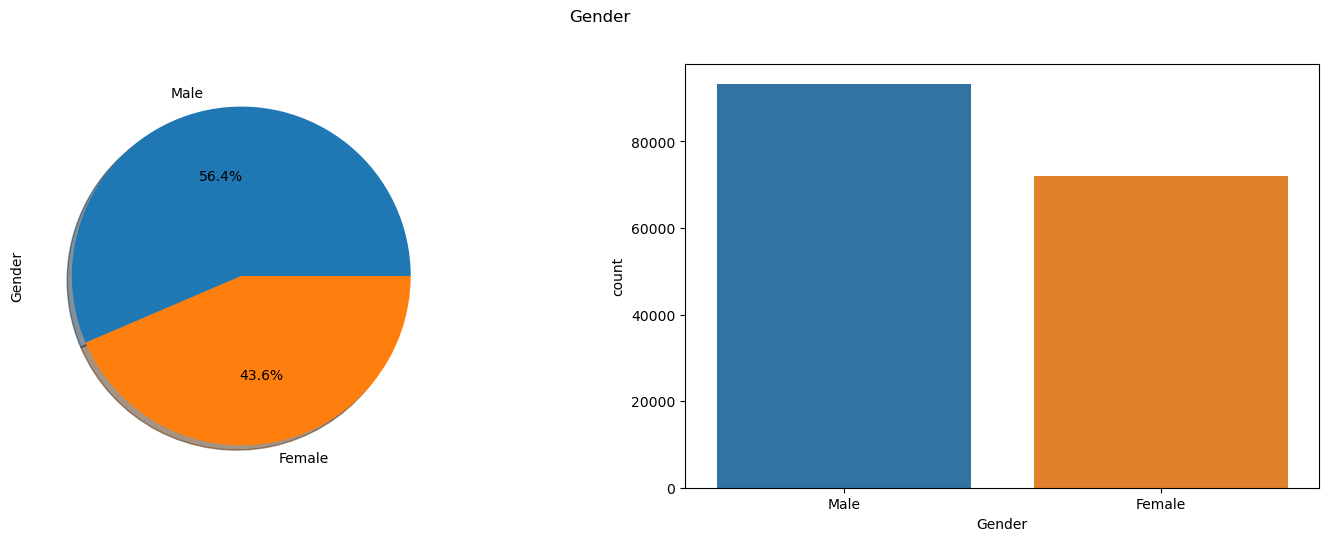

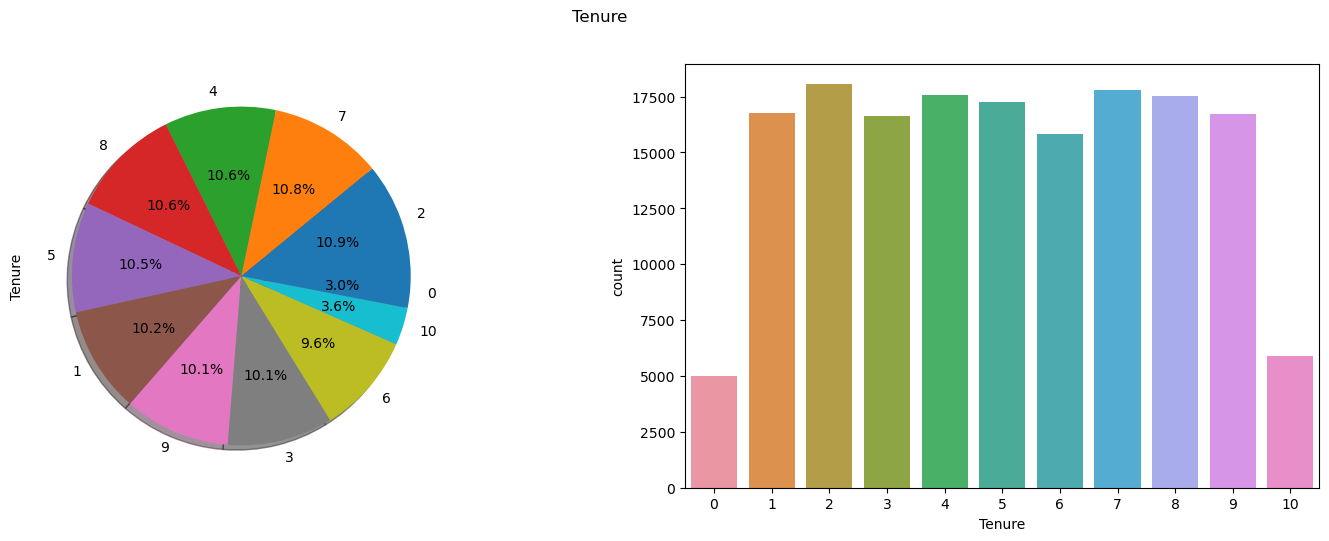

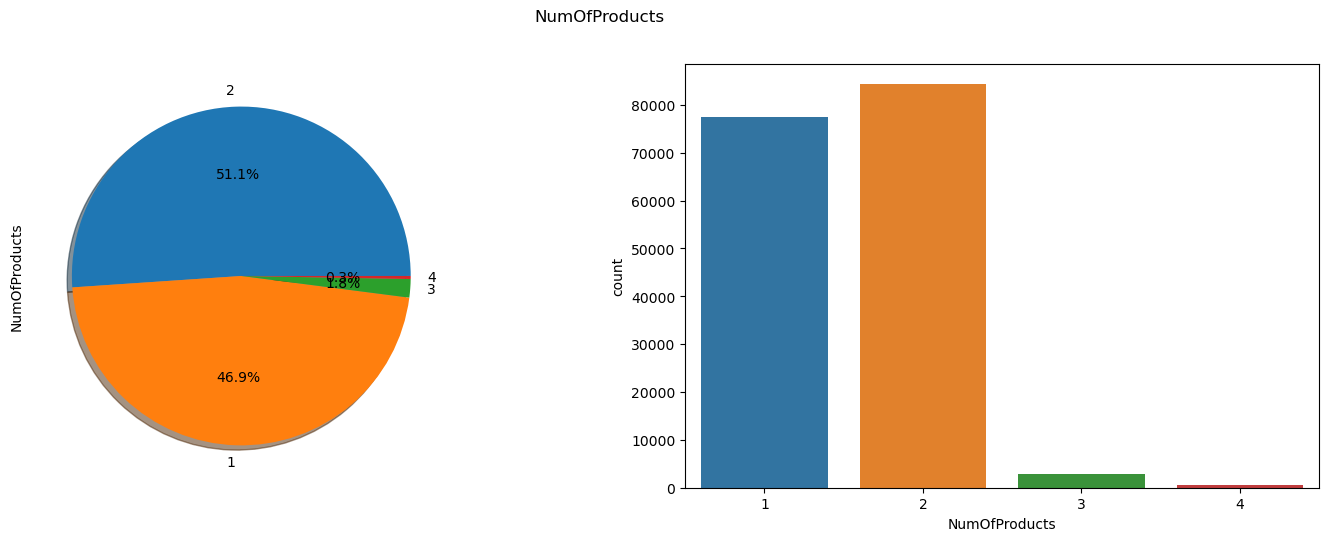

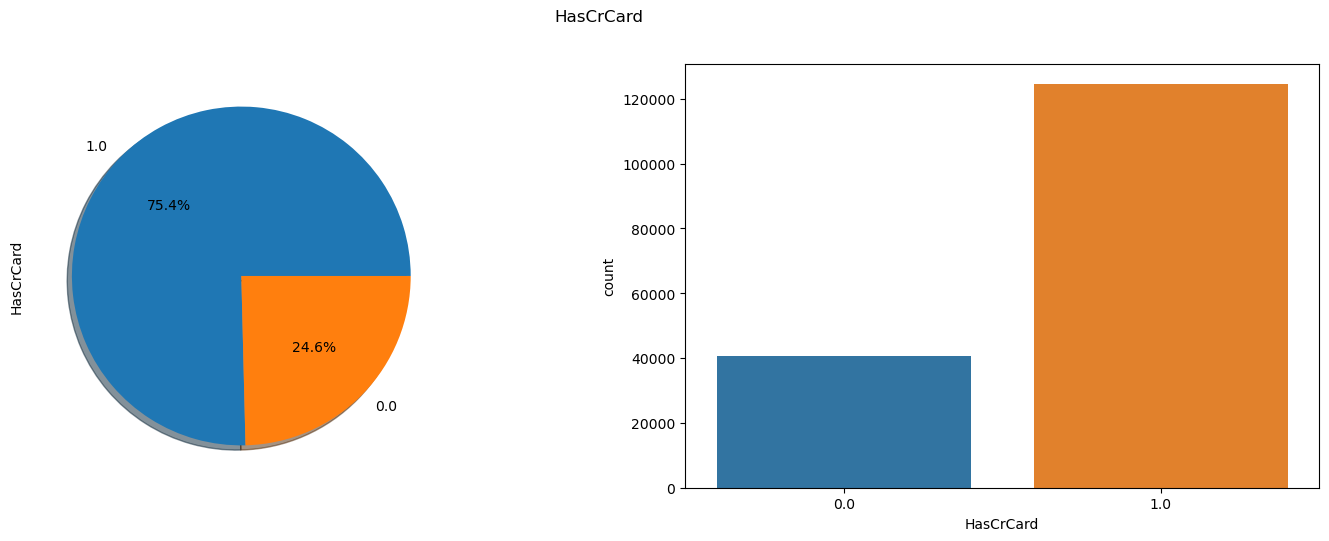

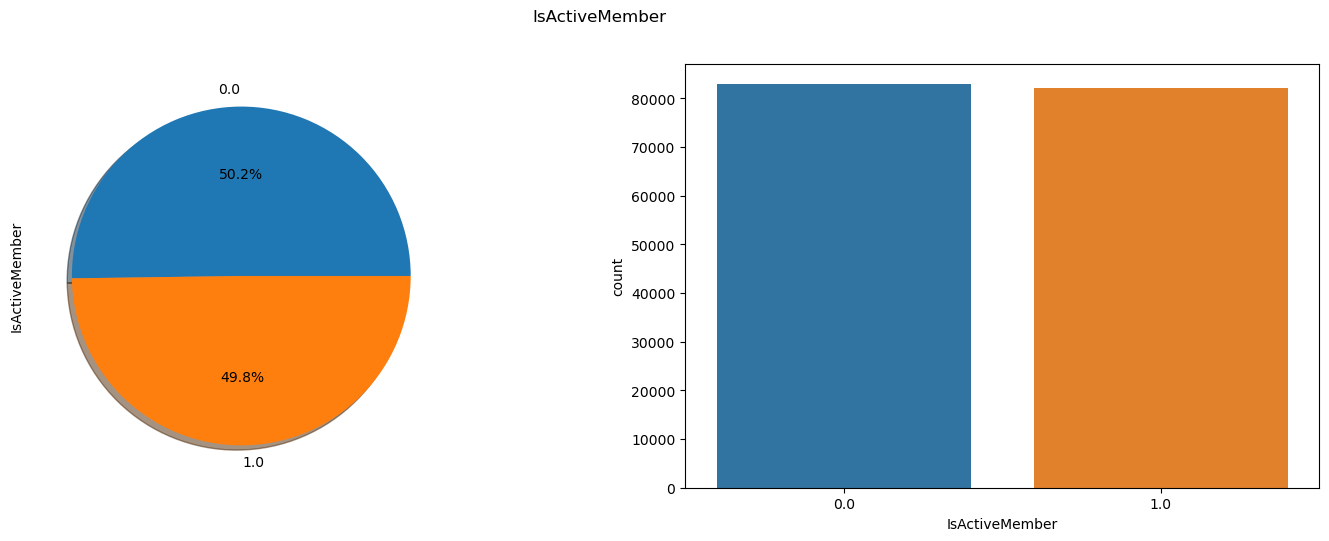

In [14]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

**범주형 변수**
- Geography : 고객이 거주하는 국가(프랑스, 스페인 또는 독일)
- Gender : 고객의 성별(남성 또는 여성)
- Tenure : 고객이 은행과 거래한 기간
- NumOfProducts : 고객이 사용하는 은행 상품 수(예: 예금 계좌, 신용카드)
- HasCrCard : 고객의 신용카드 보유 여부(1 = yes, 0 = no)
- IsActiveMember : 고객이 acitve한 회원인지 여부(1 = yes, 0 = no)

### Numerical Value Analysis

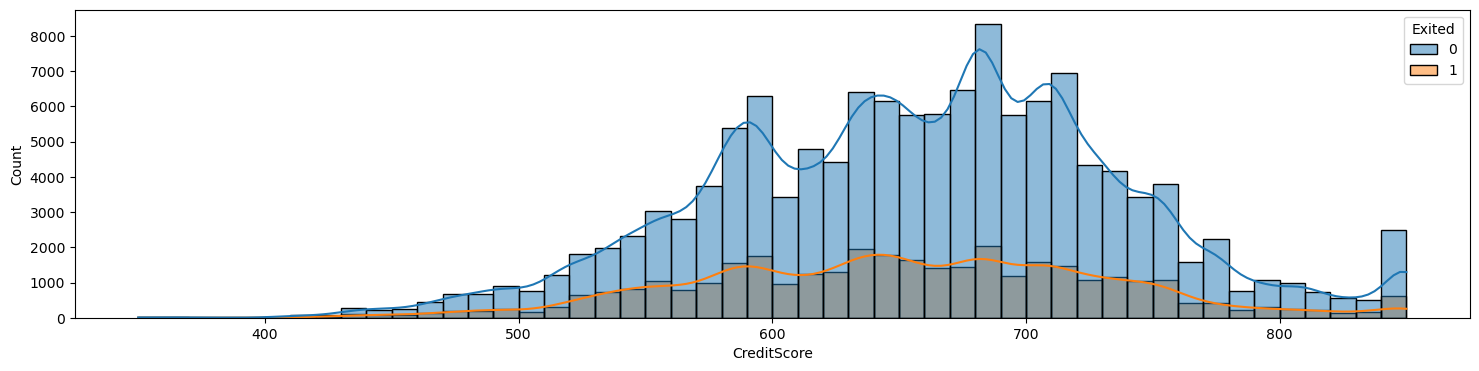

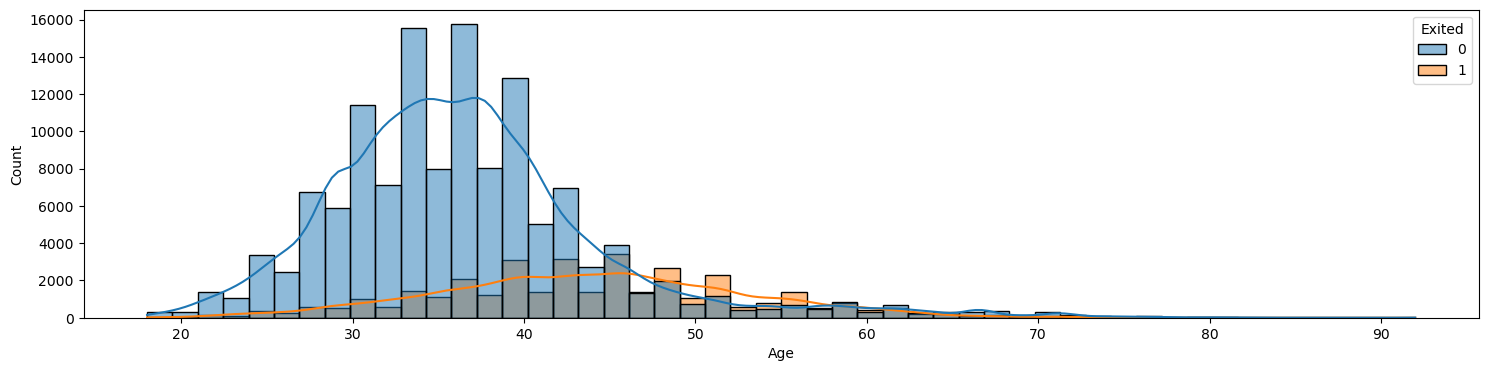

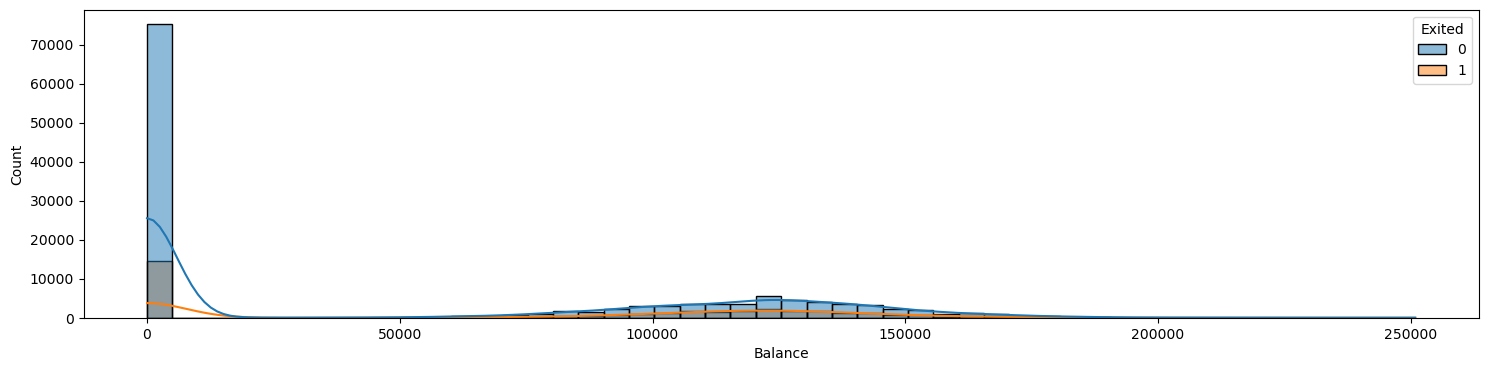

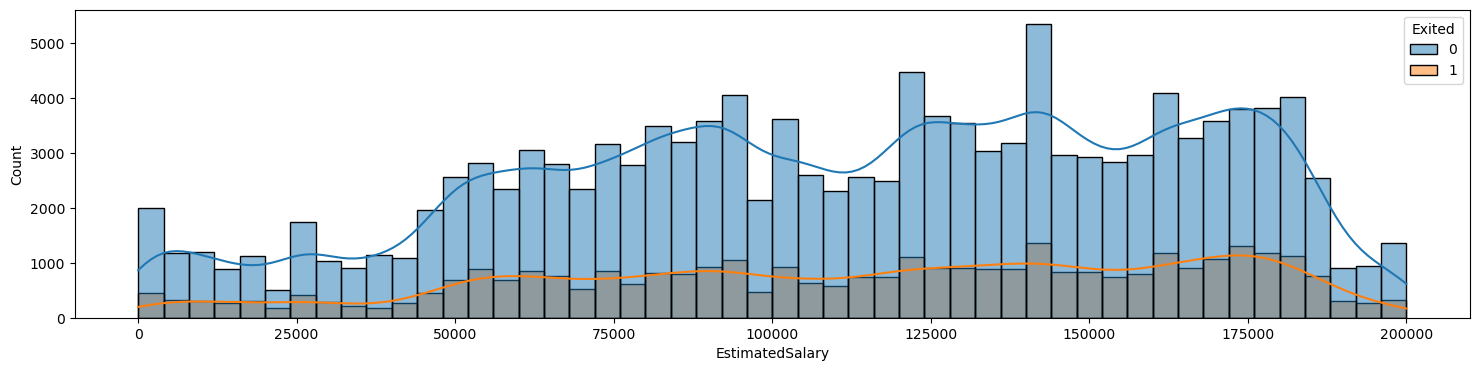

In [15]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

**연속형 데이터**
- CreditScore : 고객의 신용 점수를 나타내는 숫자 값
- Age : 고객의 나이
- Balance : 고객의 계정 잔액
- EstimatedSalary : 고객의 예상 급여

### Multivariate Anlaysis

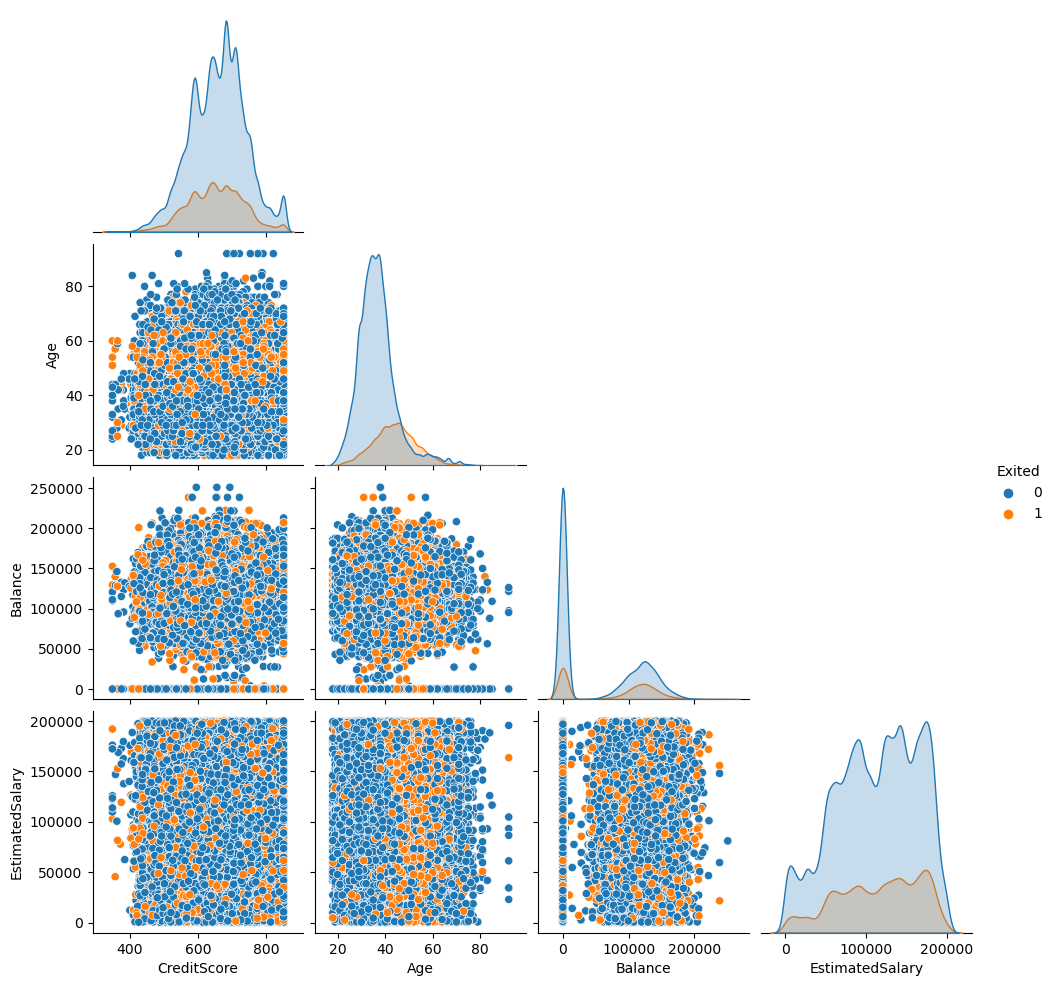

In [16]:
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()
# pairplot을 통해 변수 간 관계를 파악할 수 있다.

### Correlation Anlaysis

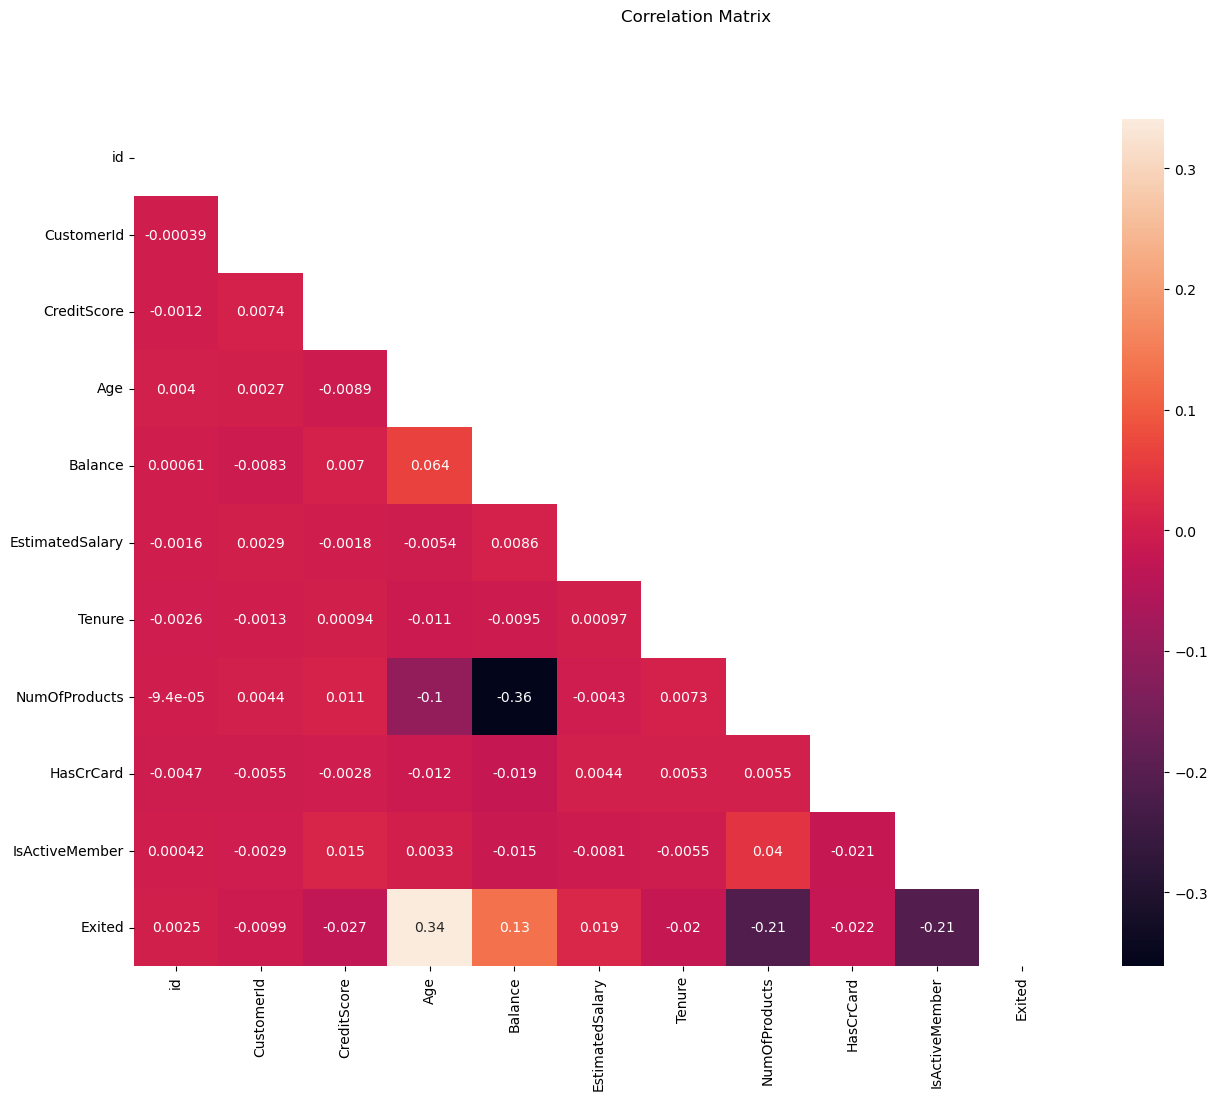

In [17]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()  # 변수들 사이의 상관 관계 행렬을 계산

mask = np.zeros_like(corr_matrix)  # 상관 관계 행렬과 동일한 크기의 0으로 채워진 배열을 생성해서 히트맵의 상단 삼각형 부분을 숨기는 데 사용
mask[np.triu_indices_from(mask)] = True  # 히트맵에서 상단 삼각형 부분을 숨김

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()